In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('iris.csv',names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
df['class_num']=le_class.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
df.drop(['class'],axis=1,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.shape

(150, 5)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
x = df.drop(['class_num'],axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = df['class_num']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class_num, dtype: int64

In [11]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.2,random_state=1)


In [12]:
model = GaussianNB()
model.fit(train_x,train_y)
prediction = model.predict(val_x)
prediction

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [13]:
score = model.score(val_x,val_y)
score

0.9666666666666667

In [14]:
confusion_matrix = confusion_matrix(val_y,prediction)
confusion_matrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(33.0, 0.5, 'Prediction')

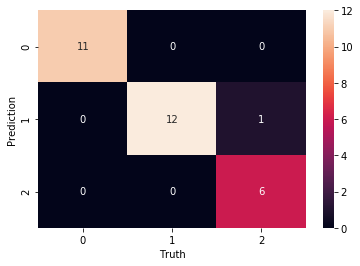

In [15]:
%matplotlib inline
import seaborn as sn
sn.heatmap(confusion_matrix,annot=True)
plt.xlabel('Truth')
plt.ylabel('Prediction')